In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sys
sys.path.append("..")
import fastcat as fc

In [2]:
ztrues=np.array([0.1,0.4,0.62,0.8,1.0])
zar=np.linspace(0,1.4,1000)

In [3]:
#photozs that we have
pzs=[]
pzs.append(("Gauss",fc.photoz.PhotoZGauss(0.02)))
pzs.append(("TwoPop",fc.photoz.PhotoZTwoPop(0.02,0.75,3.)))
pzs.append(("HiddenVar",fc.photoz.PhotoZHiddenVar(0.02,[0.1,0.2],[0.6,0.65])))
#pzs.append(("Franzona",fc.photoz.PhotoZHist("/project/projectdirs/lsst/LSSWG/Franzona/pzdist.txt")))
pzs.append(('TemplateSED',fc.photoz.PhotoZTemplateSED("/Users/aimalz/Documents/Photoz-tools/")))

Applying PZs
[(0.10156454890966415, 0.02199999988079071)]
Applying PZs
[(0.23738208413124084, 0.08799999952316284)]
Applying Hidden Var PZs
[(4.859705448150635, 2.9217633284232076)]
Applying Template SED PZs
nz=299, z_grid=299
f_mod_o(5, 1)
f_obs(5, 1)
(array([[  2.35732008e-12],
       [  8.72540010e-12],
       [  1.64447271e-11],
       [  2.29125667e-11],
       [  2.81050452e-11]]), array([[  2.34770069e-14],
       [  8.73255313e-14],
       [  1.64253285e-13],
       [  2.25018588e-13],
       [  2.75079326e-13]]))
Applying PZs
[(0.448457270860672, 0.0279999990016222)]
Applying PZs
[(0.3993869721889496, 0.1119999960064888)]
Applying Hidden Var PZs
[(11.857523918151855, 10.880077359103707)]
Applying Template SED PZs
nz=299, z_grid=299
f_mod_o(5, 1)
f_obs(5, 1)
(array([[  5.79891147e-12],
       [  9.99614039e-12],
       [  2.46488796e-11],
       [  3.48150340e-11],
       [  4.42433815e-11]]), array([[  5.74589366e-14],
       [  1.00123333e-13],
       [  2.48414615e-13],
    

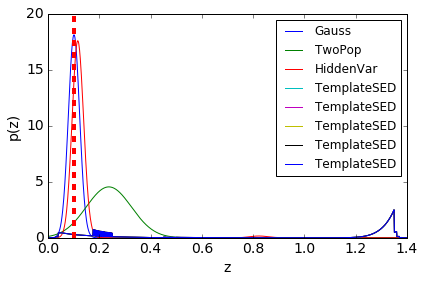

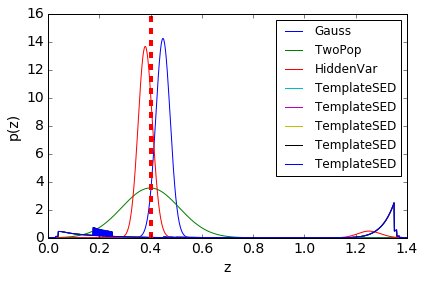

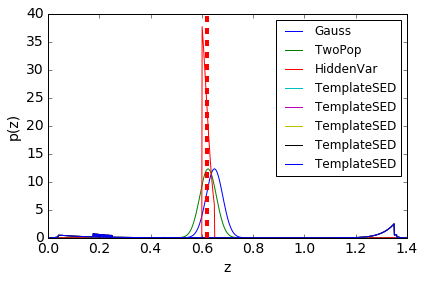

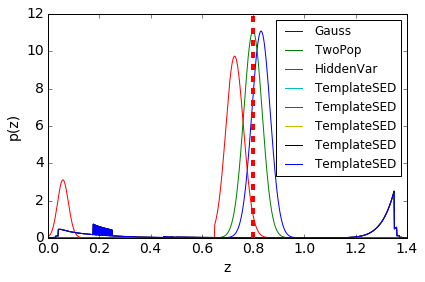

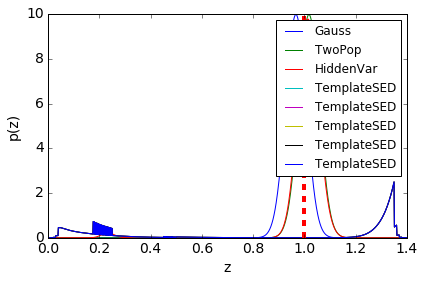

In [4]:
res = 0.1
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
for ztrue in ztrues:
    plt.figure(figsize=(6,4))
    for name,pz in pzs:
        arr=np.array(np.array([ztrue]),dtype=[('z',np.float32)])
        arr=pz.applyPhotoZ(arr)
        print arr
        p=np.array([pz.PofZ(arr,z,res) for z in zar])
        p/=np.sum(p*res)#p.sum()
        plt.plot(zar,p,label=name)
    plt.legend()
    ymin,ymax=plt.ylim()
    plt.plot([ztrue,ztrue],[ymin,ymax],'r--',lw=4)
    plt.ylim(ymin,ymax)
    plt.xlabel("z",fontsize=14)
    plt.ylabel("p(z)",fontsize=14)
    plt.tight_layout()
    plt.savefig ('ptest'+str(ztrue)+'.pdf')

Applying Template SED PZs
nz=299, z_grid=299
f_mod_o(5, 5)
f_obs(5, 5)
5.15908448557e-13


[]

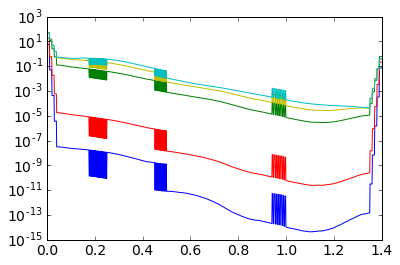

In [5]:
colors = 'brgycm'
pz = pzs[-1][1]
result = pz.applyPhotoZ(np.array(ztrues,dtype=[('z',np.float32)]))
output = np.array([pz.PofZ(result,float(z),0.1) for z in zar]).T
# print()
print(np.sum(output[0]))#axis=0))
for o in output:
    o /= np.sum(o*1.4/1000.)#np.sum(output,axis=0)
# for o in output:
#     plt.plot(zar,o)
ymin,ymax=plt.ylim()
for z in range(len(ztrues)):
    plt.plot(zar,output[z],c=colors[z])
    plt.plot([ztrues[z],ztrues[z]],[ymin,ymax],c=colors[z],lw=4)
plt.semilogy()

In [6]:
np.shape(output)

(1000, 5)

In [ ]:
arr = pzs[-1][1].applyPhotoZ(ztrues)
for photo in arr:
    #print(photo['flux'])
    plt.plot(photo)#['flux'])